In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Set the working directory
os.chdir(r'C:\Users\Guillaume\Desktop\Ironhack_189\Final_Project')

# Load the data
file_path = r'Dataset\Big_Query_GCP\hacker_news_sample.csv'
hn_sample  = pd.read_csv(file_path)
hn_sample 

,text,author,timestamp,type
0,&gt; That isn&#x27;t really the point. The poi...,ardy42,2020-07-23 20:05:04+00:00,comment
1,One of the primary traits of a good developer ...,semiel,2013-07-16 21:07:12+00:00,comment
2,"After feeling very down, so much that I didn&#...",Raphmedia,2016-01-26 15:03:03+00:00,comment
3,"First, you asserted that it was wrong for Part...",jamiequint,2008-12-20 06:22:55+00:00,comment
4,"IP matching, supercookies, browser fingerprint...",orangecat,2011-05-06 17:28:33+00:00,comment
...,...,...,...,...
2995,&gt; You don&#x27;t understand that many peopl...,pault,2019-02-22 16:39:07+00:00,comment
2996,"Intuitively, that makes sense. However, I wou...",taeric,2018-08-22 13:51:23+00:00,comment
2997,gitin is easy to use to quickly check the stat...,mekster,2020-05-31 19:50:31+00:00,comment
2998,This is a good point that I hadn&#x27;t realis...,frobozz,2015-08-10 16:05:04+00:00,comment


In [5]:
# Check for missing values in all columns.
hn_sample.isnull().sum()

text         0
author       0
timestamp    0
type         0
dtype: int64

In [6]:
hn_sample .duplicated().sum()

0

In [7]:
hn_sample['timestamp'] = pd.to_datetime(hn_sample['timestamp'], errors='coerce')  # 'coerce' will set invalid parsing as NaT
hn_sample['timestamp']

0      2020-07-23 20:05:04+00:00
1      2013-07-16 21:07:12+00:00
2      2016-01-26 15:03:03+00:00
3      2008-12-20 06:22:55+00:00
4      2011-05-06 17:28:33+00:00
                  ...           
2995   2019-02-22 16:39:07+00:00
2996   2018-08-22 13:51:23+00:00
2997   2020-05-31 19:50:31+00:00
2998   2015-08-10 16:05:04+00:00
2999   2020-09-04 14:11:34+00:00
Name: timestamp, Length: 3000, dtype: datetime64[ns, UTC]

In [8]:
hn_sample['type'].unique()

array(['comment', 'story', 'pollopt'], dtype=object)

In [9]:
# Renaming the specified columns
hn_sample_renamed = hn_sample.rename(columns={'text': 'comment', 'author': 'username', 'timestamp': 'date'})

# Dropping the 'type' column
hn_sample_renamed = hn_sample_renamed.drop('type', axis=1)

# Adding a new 'like' column with all values set to 0
hn_sample_renamed['like'] = 0

# Displaying the first few rows of the updated dataframe
hn_sample_renamed.head()


,comment,username,date,like
0,&gt; That isn&#x27;t really the point. The poi...,ardy42,2020-07-23 20:05:04+00:00,0
1,One of the primary traits of a good developer ...,semiel,2013-07-16 21:07:12+00:00,0
2,"After feeling very down, so much that I didn&#...",Raphmedia,2016-01-26 15:03:03+00:00,0
3,"First, you asserted that it was wrong for Part...",jamiequint,2008-12-20 06:22:55+00:00,0
4,"IP matching, supercookies, browser fingerprint...",orangecat,2011-05-06 17:28:33+00:00,0


In [10]:
hn_sample_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   comment   3000 non-null   object             
 1   username  3000 non-null   object             
 2   date      3000 non-null   datetime64[ns, UTC]
 3   like      3000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 93.9+ KB


In [11]:
unique_usernames = hn_sample_renamed['username'].nunique()
unique_usernames

2684

In [12]:
time_range = hn_sample_renamed['date'].agg(['min', 'max'])
time_range

min   2007-07-18 20:10:12+00:00
max   2022-11-16 06:12:48+00:00
Name: date, dtype: datetime64[ns, UTC]

In [13]:
posting_frequency = hn_sample_renamed.groupby(hn_sample_renamed['date'].dt.to_period('D')).count()['comment']
posting_frequency

C:\Users\Guillaume\AppData\Local\Temp\ipykernel_18700\2539400521.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posting_frequency = hn_sample_renamed.groupby(hn_sample_renamed['date'].dt.to_period('D')).count()['comment']


date
2007-07-18    1
2007-08-12    1
2007-08-17    1
2007-09-07    1
2007-09-29    1
             ..
2022-11-11    2
2022-11-12    3
2022-11-13    1
2022-11-14    2
2022-11-16    1
Freq: D, Name: comment, Length: 2133, dtype: int64

In [14]:
hn_sample_renamed['comment_length'] = hn_sample_renamed['comment'].apply(len)
hn_sample_renamed

,comment,username,date,like,comment_length
0,&gt; That isn&#x27;t really the point. The poi...,ardy42,2020-07-23 20:05:04+00:00,0,552
1,One of the primary traits of a good developer ...,semiel,2013-07-16 21:07:12+00:00,0,742
2,"After feeling very down, so much that I didn&#...",Raphmedia,2016-01-26 15:03:03+00:00,0,1270
3,"First, you asserted that it was wrong for Part...",jamiequint,2008-12-20 06:22:55+00:00,0,1178
4,"IP matching, supercookies, browser fingerprint...",orangecat,2011-05-06 17:28:33+00:00,0,139
...,...,...,...,...,...
2995,&gt; You don&#x27;t understand that many peopl...,pault,2019-02-22 16:39:07+00:00,0,596
2996,"Intuitively, that makes sense. However, I wou...",taeric,2018-08-22 13:51:23+00:00,0,165
2997,gitin is easy to use to quickly check the stat...,mekster,2020-05-31 19:50:31+00:00,0,189
2998,This is a good point that I hadn&#x27;t realis...,frobozz,2015-08-10 16:05:04+00:00,0,393


In [15]:
posting_frequency.index = posting_frequency.index.to_timestamp()

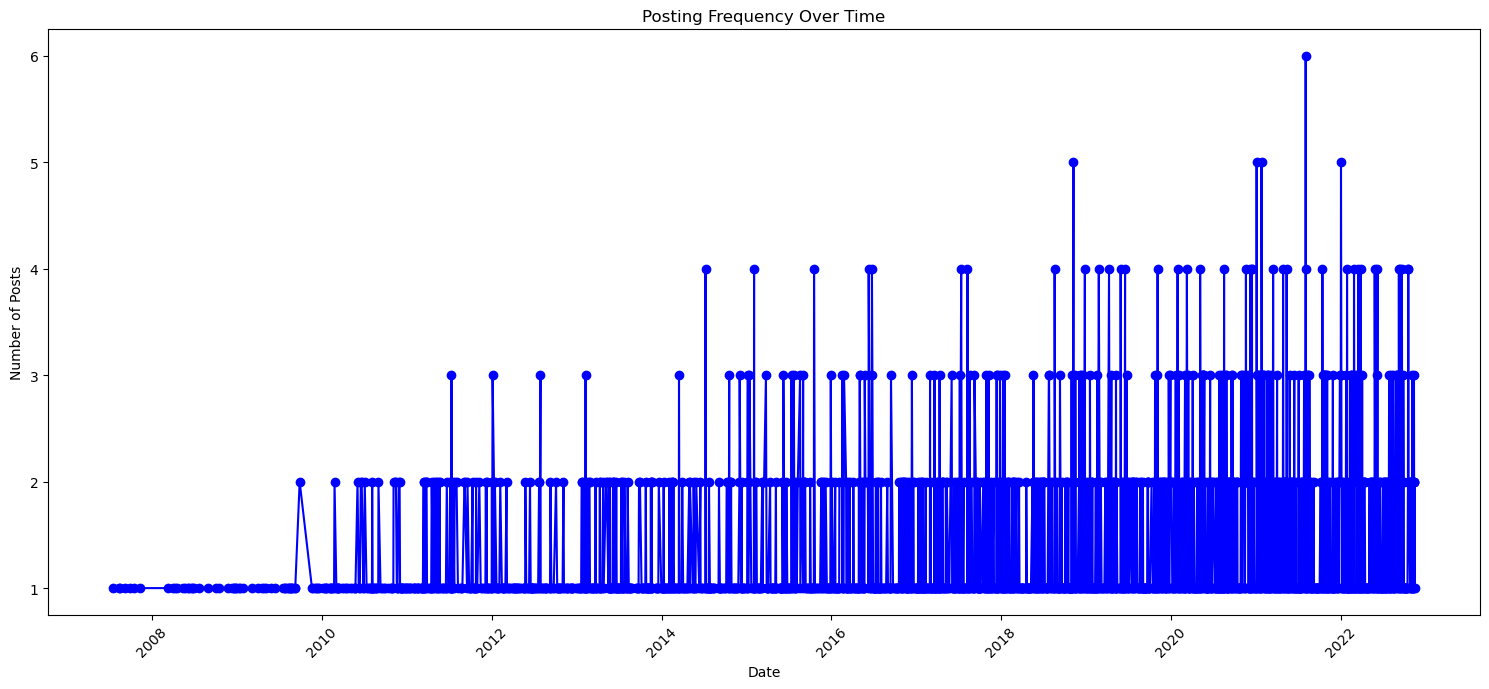

In [16]:
# Time series plot for posting frequency over time
plt.figure(figsize=(15,7))
posting_frequency_sorted = posting_frequency.sort_index()
plt.plot(posting_frequency_sorted.index, posting_frequency_sorted.values, marker='o', linestyle='-', color='b')
plt.title('Posting Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

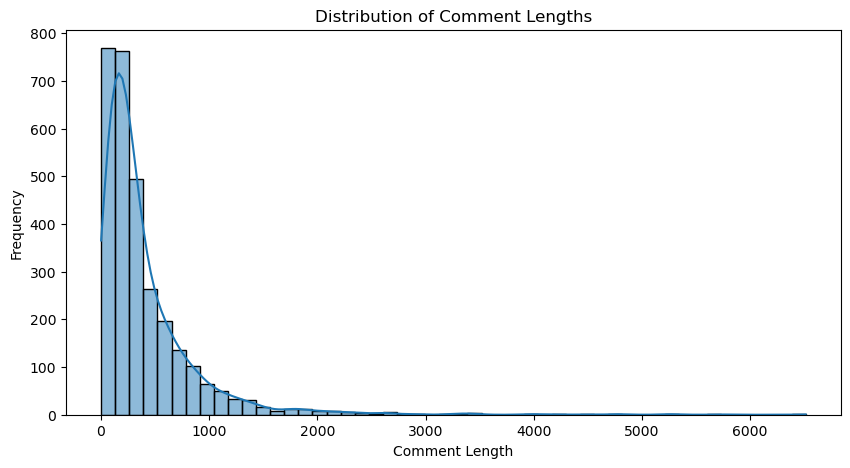

In [17]:
# Histogram for the distribution of comment lengths
plt.figure(figsize=(10,5))
sns.histplot(hn_sample_renamed['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [23]:
from sqlalchemy import create_engine 
import pymysql.cursors
import os

In [24]:
pw = os.getenv('MySQL_password')
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string)
hn_sample_renamed.to_sql('big_query_comment',engine, 'comment_toxicity', if_exists='replace', index=False)

3000

In [18]:
output_file_path = r'C:\Users\Guillaume\Desktop\Ironhack_189\Final_Project\Data Cleaning\Big_Query\cleaned_Big_Query.csv'

In [19]:
hn_sample_renamed['comment'] = hn_sample_renamed['comment'].str.replace('[^\w\s]', '', regex=True)

In [20]:
hn_sample_renamed.to_csv(output_file_path, index=False, encoding='utf-8')

In [21]:
hn_sample_renamed

,comment,username,date,like,comment_length
0,gt That isnx27t really the point The point is ...,ardy42,2020-07-23 20:05:04+00:00,0,552
1,One of the primary traits of a good developer ...,semiel,2013-07-16 21:07:12+00:00,0,742
2,After feeling very down so much that I didnx27...,Raphmedia,2016-01-26 15:03:03+00:00,0,1270
3,First you asserted that it was wrong for Party...,jamiequint,2008-12-20 06:22:55+00:00,0,1178
4,IP matching supercookies browser fingerprints ...,orangecat,2011-05-06 17:28:33+00:00,0,139
...,...,...,...,...,...
2995,gt You donx27t understand that many people pre...,pault,2019-02-22 16:39:07+00:00,0,596
2996,Intuitively that makes sense However I would ...,taeric,2018-08-22 13:51:23+00:00,0,165
2997,gitin is easy to use to quickly check the stat...,mekster,2020-05-31 19:50:31+00:00,0,189
2998,This is a good point that I hadnx27t realised ...,frobozz,2015-08-10 16:05:04+00:00,0,393
